In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import axes3d, Axes3D
properati = pd.read_csv('datos/caba_para_mapa.csv',error_bad_lines=False)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [ ]:
def function(x):
    if(x<1500):
        return 'green'
    if(x<2000):
        return 'pink'
    if(x<2500):
        return 'gray'
    if(x<3000):
        return 'red'
    if(x<3500):
        return 'blue'
    return 'black'
properati_CABA=properati[properati['place_name'].str.contains('Capital Federal') & properati['property_type'].str.contains('apartment')]
properati_CABA=properati_CABA[['lat-lon','price_usd_per_m2','surface_covered_in_m2']].dropna()
properati_CABA['lon']=properati_CABA['lat-lon'].str.split(",").str[0].str.replace("-34.","").astype(int)
properati_CABA['lat']=properati_CABA['lat-lon'].str.split(",").str[1].str.replace("-58.","").astype(int)
properati_CABA['price_usd_per_m2']=properati_CABA['price_usd_per_m2'].astype(int)
properati_CABA['surface_covered_in_m2']=properati_CABA['surface_covered_in_m2'].astype(int)
properati_CABA['color']=properati_CABA['price_usd_per_m2'].apply(function)

In [ ]:

threedee = plt.figure().gca(projection='3d')
threedee.scatter(properati_CABA['lat'], properati_CABA['lon'], properati_CABA['surface_covered_in_m2'],c=properati_CABA['color'],marker='^')
plt.show()

# Ejemplo trivial KNN con cross validation (CV)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

#spliteo en set de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3 ) # al asignarle random_state devuelve siempre lo mismo 
#entreno el set y veo el puntaje que tiene sobre el test
reg=neigh.fit(X_train, y_train)
print (X_test)
#prediccion=reg.predict(X_test)
#print (prediccion)
print (y_test)
print (reg.score(X_test,y_test))


[[-1. -1.]
 [ 2.  2.]
 [ 0.  0.]
 [ 1.  1.]
 [-1. -1.]]
[2 3 0 1 2]
1.0


## CV varias veces en ejemplo anterior

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,10): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    reg=neigh.fit(X_train, y_train)
    scores.append(reg.score(X_train,y_train))
print(scores) 
print(np.mean(scores))

[0.86842105263157898, 0.8666666666666667, 1.0, 0.89873417721518989, 0.96825396825396826, 0.75, 0.91578947368421049, 1.0, 0.97894736842105268, 1.0]
0.924681270687


# Plot de los diferentes puntajes segun K

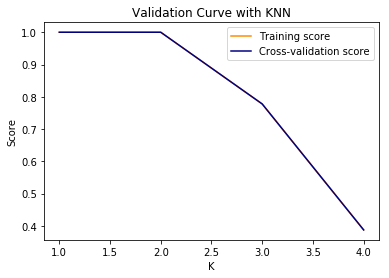

In [84]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])

param_range=range(1,5)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy")

plt.legend(loc="best")
plt.show()

###  Training vs CV score

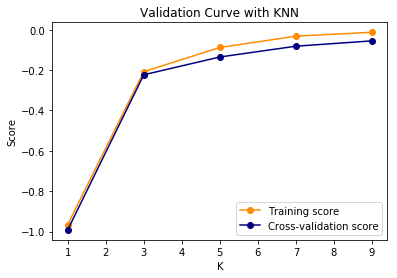

In [25]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsRegressor

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])
y = properati['price_per_m2']

param_range=range(1,10,2)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2,scoring="r2" ,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange",marker="o")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()


### Probe escalando los datos, y tampoco funciona

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

from sklearn.preprocessing import StandardScaler  
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()  

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])

y = properati['price_per_m2']

neigh = KNeighborsRegressor(n_neighbors=15,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,5): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    scaler.fit(X_train) #siempre solo a train
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    reg=neigh.fit(X_train, y_train)
    scores.append(reg.score(X_train,y_train))
print(np.mean(scores))

#otra forma
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
reg = make_pipeline(StandardScaler(), neigh)
cross_val_score(reg, X, y, cv=3)


0.0382702543


array([-0.10440437, -0.03805398, -0.17052928])

In [60]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsRegressor

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])
y = properati['price_per_m2']
scaler.fit(X) #siempre solo a train

param_range=range(1,10,2)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2,scoring="r2" ,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange",marker="o")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()

Process PoolWorker-4:
Process PoolWorker-2:
Traceback (most recent call last):
Process PoolWorker-3:
Process PoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/pool.py", l

KeyboardInterrupt: 

### Learning curve

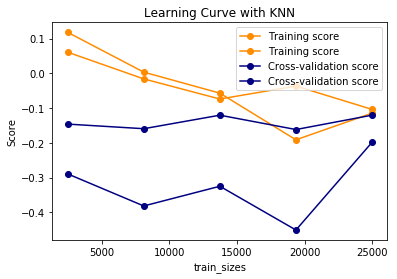

In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import learning_curve
#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])
y = zip(properati['price_per_m2'],properati['price_per_m2'])
#Pone numeros en nans
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X=imp.transform(X)


neigh = KNeighborsRegressor(n_neighbors=10,n_jobs=-1)

param_range=(10,20)
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsRegressor(), X, y, cv=2)

plt.title("Learning Curve with KNN")
plt.xlabel("train_sizes")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores, label="Training score",
color="darkorange",marker="o")
plt.plot(train_sizes, valid_scores, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()


## Ejemplo GridSearch

In [51]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

#preparo set de datos
X = zip(properati['surface_total_in_m2'],properati['price_usd_per_m2'])
y = properati['price']
#Pone numeros en nans
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X=imp.transform(X)

neigh = KNeighborsRegressor(n_neighbors=1,n_jobs=-1)
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean training score: {0:.3f} (std: {1:.3f})".format(
                results['mean_train_score'][candidate],
                results['std_train_score'][candidate]))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
        
k=range(50,100)
param_grid = {"n_neighbors": k}
grid_search = GridSearchCV(neigh,param_grid=param_grid,cv=2,scoring="neg_mean_squared_error")
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

ValueError: Expected 2D array, got 1D array instead:
array=[ 29.   0.   0. ...,  40.  nan  nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Random Search

In [39]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])
y = zip(properati['price_usd_per_m2'],properati['price_usd_per_m2'])
#Pone numeros en nans
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X=imp.transform(X)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(y)
y=imp.transform(y)

neigh = KNeighborsRegressor(n_jobs=-1)
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
        
k=range(1,100,5)
param_grid = {"n_neighbors": k}
# run randomized search
random_search = RandomizedSearchCV(neigh, param_distributions=param_grid,
n_iter=20)
start = time()
random_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(random_search.cv_results_['params'])))
report(random_search.cv_results_)

GridSearchCV took 44.79 seconds for 20 candidate parameter settings.
Model with rank: 1
Mean validation score: -0.027 (std: 0.035)
Parameters: {'n_neighbors': 61}

Model with rank: 2
Mean validation score: -0.027 (std: 0.032)
Parameters: {'n_neighbors': 56}

Model with rank: 3
Mean validation score: -0.028 (std: 0.030)
Parameters: {'n_neighbors': 66}

Model with rank: 4
Mean validation score: -0.031 (std: 0.035)
Parameters: {'n_neighbors': 76}

Model with rank: 5
Mean validation score: -0.031 (std: 0.039)
Parameters: {'n_neighbors': 86}

Model with rank: 6
Mean validation score: -0.032 (std: 0.036)
Parameters: {'n_neighbors': 46}

Model with rank: 7
Mean validation score: -0.032 (std: 0.030)
Parameters: {'n_neighbors': 71}

Model with rank: 8
Mean validation score: -0.032 (std: 0.038)
Parameters: {'n_neighbors': 51}

Model with rank: 9
Mean validation score: -0.032 (std: 0.038)
Parameters: {'n_neighbors': 81}

Model with rank: 10
Mean validation score: -0.034 (std: 0.043)
Parameters: {

# =======================================================

# IMPLEMENTACIÓN KNN


In [3]:
properati_reduce=properati
properati_reduce=properati_reduce.dropna().reset_index()

In [4]:
training_samples=[]
test_samples=[]
k=10
test_samples_index=[100,150,200,350,400,450,460,461,462] #Indices de los elementos de prueba en el df
for index, row in properati_reduce.iterrows():
    if (index not in test_samples_index): #Uso para entrenar todos los indices, menos los de prueba.
        training_samples.append([row['surface_total_in_m2'],row['floor'],row['rooms'],row['lat'],row['lon'],row['distancia_subte'],row['distancia_universidad']])
    else:
        test_samples.append([row['surface_total_in_m2'],row['floor'],row['rooms'],row['lat'],row['lon'],row['distancia_subte'],row['distancia_universidad']])
        training_samples.append([0,0,0,0,0,0,0])


In [5]:
nbrs=NearestNeighbors(n_neighbors=k,algorithm ='kd_tree').fit(training_samples)

In [6]:
distances,indices=nbrs.kneighbors(test_samples) # Le paso las caracteristicas de los test de prueba para aplicar KNN

In [7]:
i=0
for index in test_samples_index:
    mean=[]
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Original : ",properati_reduce[index:index+1]['price_usd_per_m2'].iloc[0])
    for j in range(k):
        print("|","Neighbor",j,": ",properati_reduce[indices[i][j]:indices[i][j]+1]['price_usd_per_m2'].iloc[0])
        mean.append(properati_reduce[indices[i][j]:indices[i][j]+1]['price_usd_per_m2'].iloc[0])
    print("Mean: ",sum(mean)//len(mean))
    i+=1

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2222.0
| Neighbor 0 :  2500.0
| Neighbor 1 :  3076.0
| Neighbor 2 :  3000.0
| Neighbor 3 :  3010.0
| Neighbor 4 :  3805.0
| Neighbor 5 :  3074.0
| Neighbor 6 :  2027.0
| Neighbor 7 :  2742.0
| Neighbor 8 :  2959.0
| Neighbor 9 :  3000.0
Mean:  2919.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  1744.0
| Neighbor 0 :  1744.0
| Neighbor 1 :  1744.0
| Neighbor 2 :  1790.0
| Neighbor 3 :  1744.0
| Neighbor 4 :  1790.0
| Neighbor 5 :  1744.0
| Neighbor 6 :  1744.0
| Neighbor 7 :  1790.0
| Neighbor 8 :  2044.0
| Neighbor 9 :  2162.0
Mean:  1829.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2444.0
| Neighbor 0 :  2862.0
| Neighbor 1 :  1938.0
| Neighbor 2 :  2275.0
| Neighbor 3 :  2345.0
| Neighbor 4 :  3475.0
| Neighbor 5 :  1641.0
| Neighbor 6 :  3795.0
| Neighbor 7 :  1987.0
| Neighbor 8 :  3062.0
| Neighbor 9 :  1569.0
Mean:  2494.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original :  2322.0
| Neighbor 0 :  2322.0
| Neighbor 1 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 1,2, 1,2, 1,2, 1,2, 1])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,10): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    clf=neigh.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
print(scores) #no estoy seguro como funciona esto
print(np.mean(scores))

[0.10714285714285721, -0.42857142857142838, -0.42857142857142838, 0.37500000000000006, -4.0, -2.7499999999999987, 0.16666666666666663, -0.42857142857142838, -0.42857142857142838, 0.16666666666666663]
-0.764880952381
